In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体为 SimHei，避免中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

在 井深(m) 图中发现 87 个裂缝点
在 钻压(kN) 图中发现 87 个裂缝点
在 瞬时机械钻速(m/h) 图中发现 87 个裂缝点
在 立管压力(MPa) 图中发现 87 个裂缝点
图片已成功保存到 drilling_data_plot.png


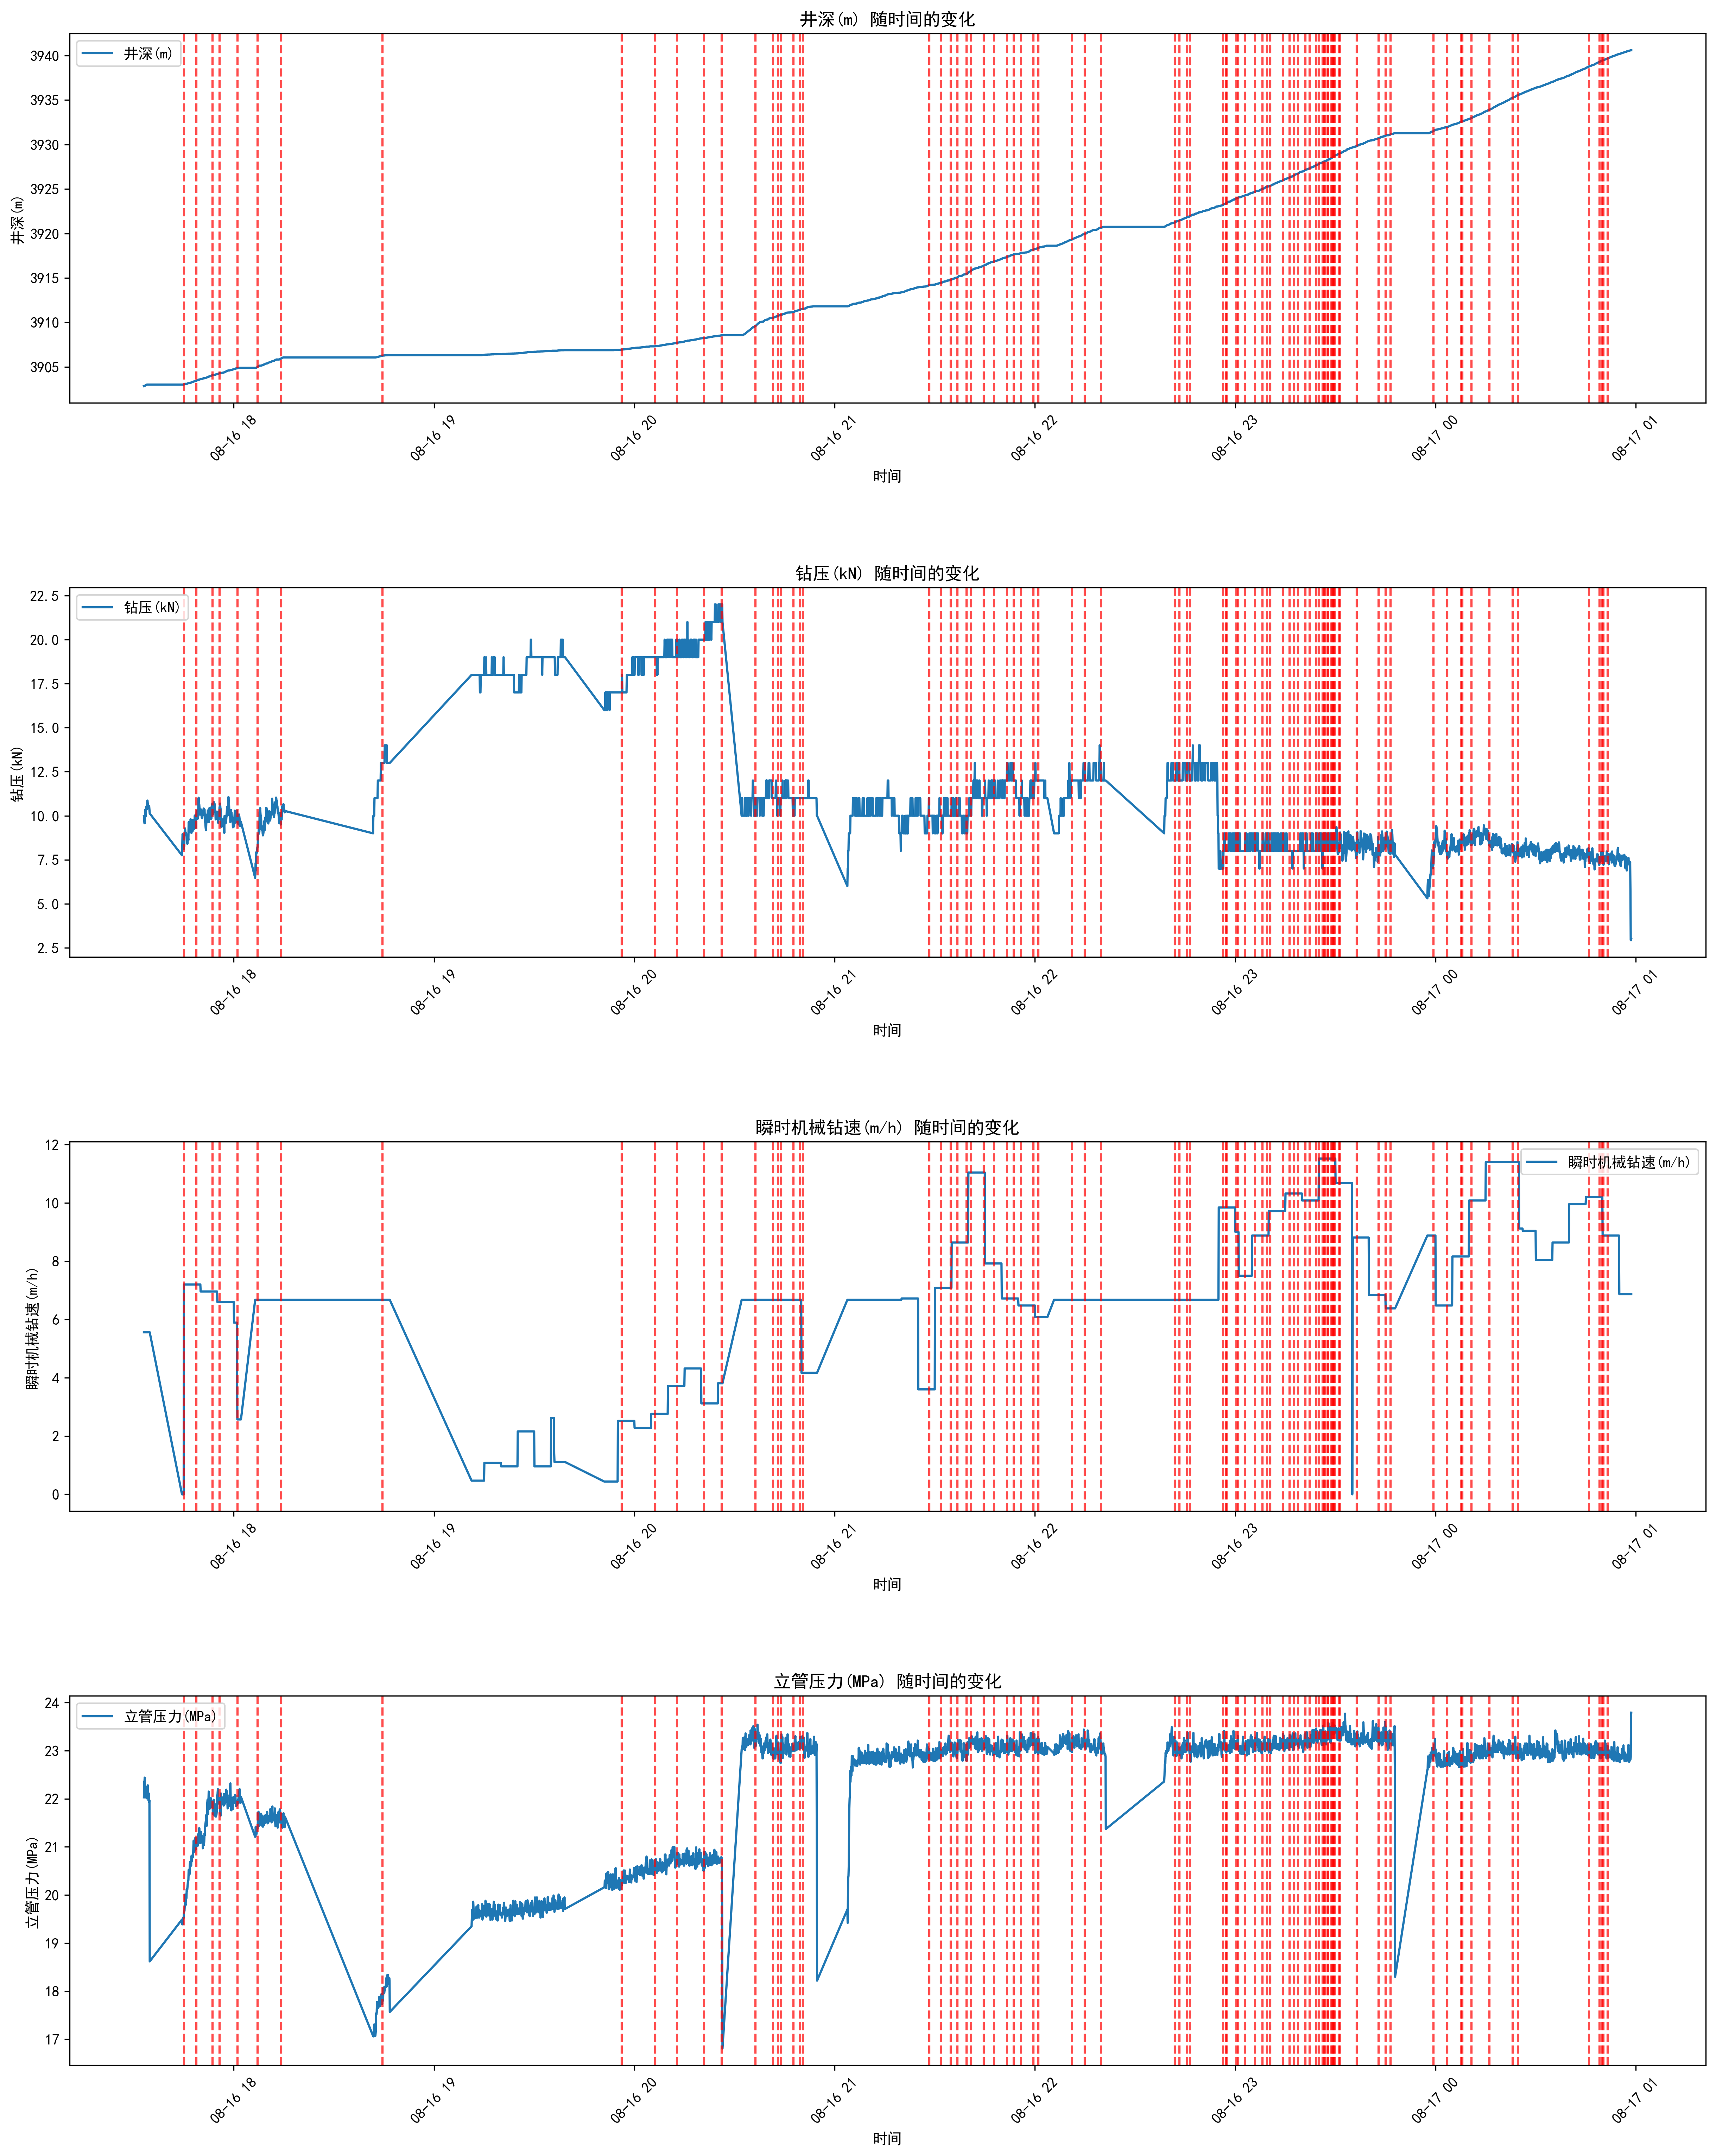

In [3]:
# 读取 Excel 文件
file_path = '训练数据_校准后_含校正标记.xlsx'
try:
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"错误: 文件 {file_path} 未找到。")
except Exception as e:
    print(f"错误: 读取文件时出现问题 - {e}")
else:
    # 转换时间列为 datetime 类型
    df['时间'] = pd.to_datetime(df['时间'])

    # 定义要绘制的列
    columns_to_plot = ['井深(m)', '钻压(kN)', '瞬时机械钻速(m/h)', '立管压力(MPa)']

    # 创建一个包含 4 个子图的图形，进一步增大宽度并提高分辨率
    fig, axes = plt.subplots(4, 1, figsize=(20, 25), dpi=300)

    for i, column in enumerate(columns_to_plot):
        # 绘制主要数据
        axes[i].plot(df['时间'], df[column], label=column)

        # 找出存在裂缝的点
        fracture_points = df[df['是否存在裂缝'] == '有']
        if not fracture_points.empty:
            print(f"在 {column} 图中发现 {len(fracture_points)} 个裂缝点")
            for time_point in fracture_points['时间']:
                axes[i].axvline(x=time_point, color='red', linestyle='--', alpha=0.7)
        else:
            print(f"在 {column} 图中未发现裂缝点")

        # 设置子图标题和标签
        axes[i].set_title(f'{column} 随时间的变化')
        axes[i].set_xlabel('时间')
        axes[i].set_ylabel(column)
        axes[i].legend()

        # 旋转 x 轴标签以提高可读性
        for tick in axes[i].get_xticklabels():
            tick.set_rotation(45)

    # 自动调整布局，增加子图之间的垂直间距
    plt.subplots_adjust(hspace=0.5)
    # 保存图片
    save_path = 'drilling_data_plot.png'
    try:
        plt.savefig(save_path)
        print(f"图片已成功保存到 {save_path}")
    except Exception as e:
        print(f"保存图片时出现错误: {e}")
    # 显示图形
    plt.show()
    